Fatman Evalutionary Model - the Base code (adding pepple)

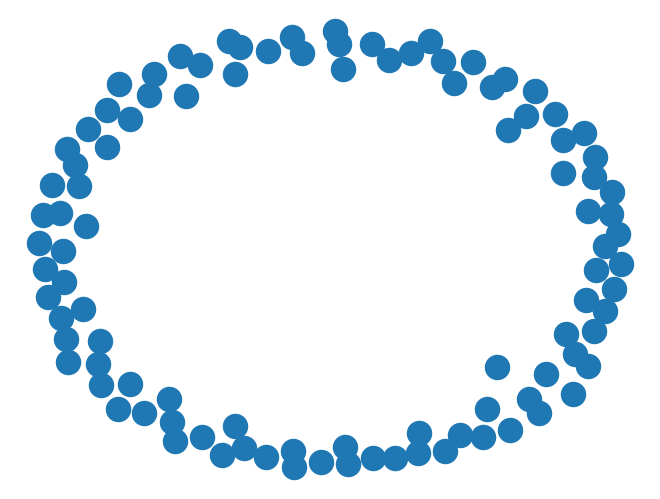

In [4]:
import networkx as nx

import matplotlib.pyplot as plt

G = nx.Graph()

# G.add_nodes_from(range(1,101))

for i in range(1,101):
    G.add_node(i)

nx.draw(G)

plt.show()

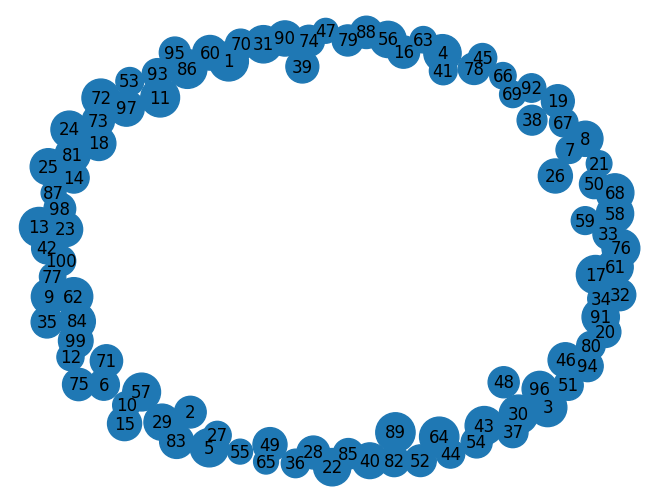

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def create_graph():
    G = nx.Graph()
    for i in range(1,101):
        G.add_node(i)
    return G

def visualize(G,labeldict,nodesize):
    nx.draw(G,labels= labeldict,node_size = nodesize)
    plt.show()

# body mass index
def assign_bmi(G):
    for each in G.nodes():
        G.nodes[each]['name'] = random.randint(15,40)
        G.nodes[each]['type'] = 'person'

def get_labels(G):
    dict = {}
    for each in G.nodes():
        dict[each] = G.nodes[each]['name']

def get_size(G):
    array1 = []
    for each in G.nodes():
        array1.append(G.nodes[each]['name']*20)
    return array1

G = create_graph()
assign_bmi(G)
labeldict = get_labels(G)
nodesize = get_size(G)
visualize(G,labeldict,nodesize)


Fatman Evalutionary Model - the Base code (Adding Social Foci)

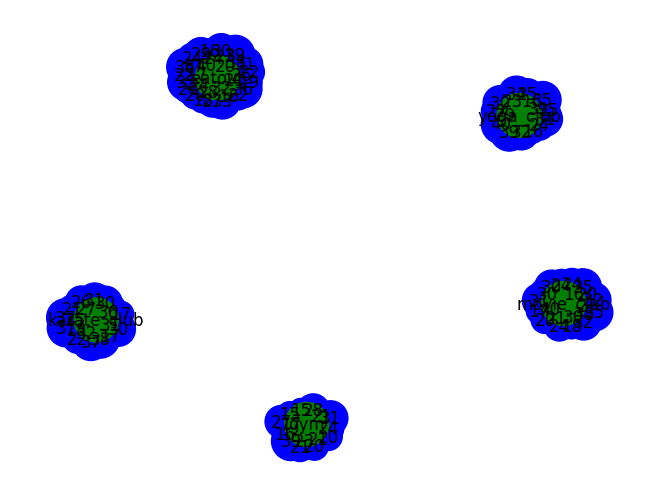

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def create_graph():
    G = nx.Graph()
    for i in range(1, 101):
        G.add_node(i)
    return G

def visualize(G, labeldict, nodesize, colors):
    nx.draw(G, labels=labeldict, node_size=nodesize,node_color=colors)
    plt.show()

# Body mass index
def assign_bmi(G):
    for each in G.nodes():
        G.nodes[each]['name'] = random.randint(15, 40)
        G.nodes[each]['type'] = 'person'

def get_labels(G):
    label_dict = {}
    for each in G.nodes():
        label_dict[each] = G.nodes[each]['name']
    return label_dict

def get_size(G):
    size_array = []
    for each in G.nodes():
        if G.nodes[each]['type'] == 'person':
            size_array.append(G.nodes[each]['name'] * 20)
        else:
            size_array.append(1000)
    return size_array

def add_foci_nodes(G):
    n = G.number_of_nodes()
    i = n + 1
    foci_nodes = ['gym', 'eatout', 'movie_club', 'karate_club', 'yoga_club']
    for j in range(5):
        G.add_node(i)
        G.nodes[i]['name'] = foci_nodes[j]
        G.nodes[i]['type'] = 'foci'
        i += 1

def get_colors(G):
    c = []
    for each in G.nodes():
        if G.nodes[each]['type'] == 'person':
            c.append('blue')
        else:
            c.append('green')
    return c

def get_foci_nodes():
    f = []
    for each in G.nodes():
        if G.nodes[each]['type'] == 'foci':
            f.append(each)
    return f

def get_person_nodes():
    f = []
    for each in G.nodes():
        if G.nodes[each]['type'] == 'person':
            f.append(each)
    return f

def add_foci_edges():
    foci_nodes = get_foci_nodes()
    person_nodes = get_person_nodes()
    for each in person_nodes:
        r = random.choice(foci_nodes)
        G.add_edge(each,r)

G = create_graph()
assign_bmi(G)
add_foci_nodes(G)
labeldict = get_labels(G)  
nodesize = get_size(G)
color_array = get_colors(G)
add_foci_edges()
visualize(G, labeldict, nodesize,color_array)


Fatman Evalution model - Implementation of homophily

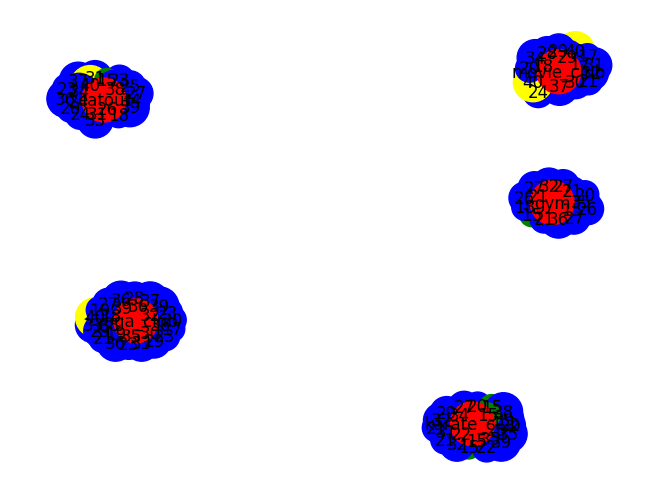

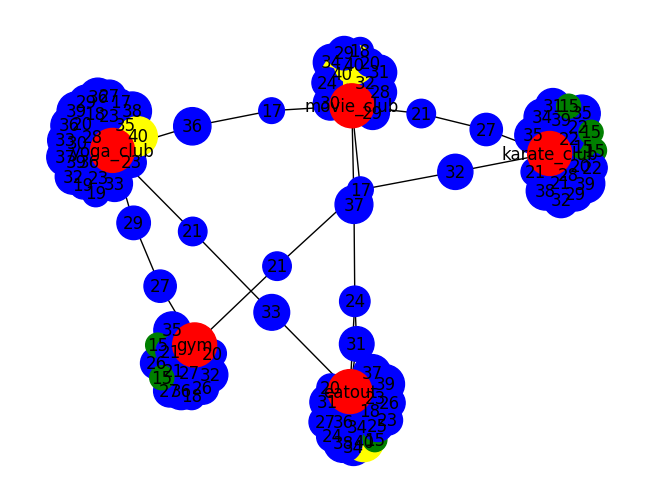

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def create_graph():
    G = nx.Graph()
    for i in range(1, 101):
        G.add_node(i)
    return G

def visualize(G, labeldict, nodesize, colors):
    nx.draw(G, labels=labeldict, node_size=nodesize,node_color=colors)
    plt.show()

# Body mass index
def assign_bmi(G):
    for each in G.nodes():
        G.nodes[each]['name'] = random.randint(15, 40)
        G.nodes[each]['type'] = 'person'

def get_labels(G):
    label_dict = {}
    for each in G.nodes():
        label_dict[each] = G.nodes[each]['name']
    return label_dict

def get_size(G):
    size_array = []
    for each in G.nodes():
        if G.nodes[each]['type'] == 'person':
            size_array.append(G.nodes[each]['name'] * 20)
        else:
            size_array.append(1000)
    return size_array

def add_foci_nodes(G):
    n = G.number_of_nodes()
    i = n + 1
    foci_nodes = ['gym', 'eatout', 'movie_club', 'karate_club', 'yoga_club']
    for j in range(5):
        G.add_node(i)
        G.nodes[i]['name'] = foci_nodes[j]
        G.nodes[i]['type'] = 'foci'
        i += 1

def get_colors(G):
    c = []
    for each in G.nodes():
        if G.nodes[each]['type'] == 'person':
            if G.nodes[each]['name']==15:
                c.append('green')
            elif G.nodes[each]['name']==40:
                c.append('yellow')
            else:
                c.append('blue')
        else:
            c.append('red')
    return c

def get_foci_nodes():
    f = []
    for each in G.nodes():
        if G.nodes[each]['type'] == 'foci':
            f.append(each)
    return f

def get_person_nodes():
    f = []
    for each in G.nodes():
        if G.nodes[each]['type'] == 'person':
            f.append(each)
    return f

def add_foci_edges():
    foci_nodes = get_foci_nodes()
    person_nodes = get_person_nodes()
    for each in person_nodes:
        r = random.choice(foci_nodes)
        G.add_edge(each,r)

def homophily(G):
    pnodes = get_person_nodes()
    for u in pnodes:
        for v in pnodes:
            if u!=v:
                diff = abs(G.nodes[u]['name'] - G.nodes[v]['name'])
                p = float(1) / (diff+1000)
                r= random.uniform(0,1)
                if r<p:
                    G.add_edge(u,v)

G = create_graph()
assign_bmi(G)
add_foci_nodes(G)
labeldict = get_labels(G)  
nodesize = get_size(G)
color_array = get_colors(G)
add_foci_edges()
visualize(G, labeldict, nodesize,color_array)
homophily(G)
visualize(G, labeldict, nodesize,color_array)


Fatman Evaluation model - Implementation Closures

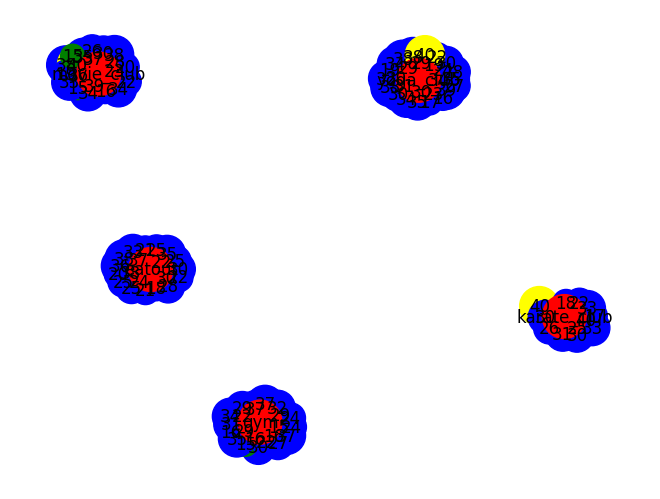

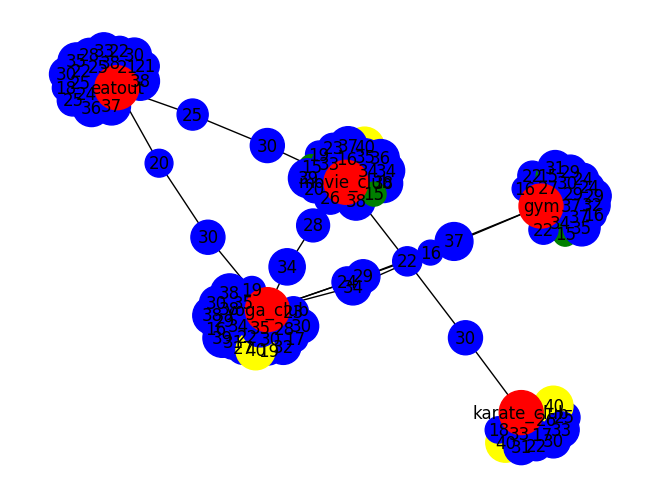

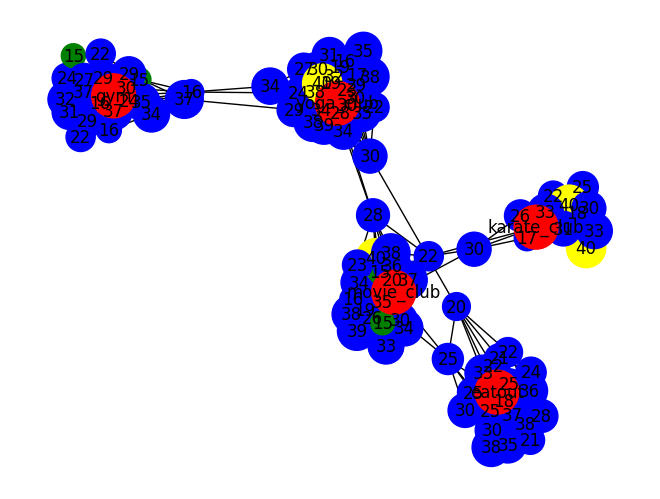

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import math

def create_graph():
    G = nx.Graph()
    for i in range(1, 101):
        G.add_node(i)
    return G

def visualize(G, labeldict, nodesize, colors):
    nx.draw(G, labels=labeldict, node_size=nodesize,node_color=colors)
    plt.show()

# Body mass index
def assign_bmi(G):
    for each in G.nodes():
        G.nodes[each]['name'] = random.randint(15, 40)
        G.nodes[each]['type'] = 'person'

def get_labels(G):
    label_dict = {}
    for each in G.nodes():
        label_dict[each] = G.nodes[each]['name']
    return label_dict

def get_size(G):
    size_array = []
    for each in G.nodes():
        if G.nodes[each]['type'] == 'person':
            size_array.append(G.nodes[each]['name'] * 20)
        else:
            size_array.append(1000)
    return size_array

def add_foci_nodes(G):
    n = G.number_of_nodes()
    i = n + 1
    foci_nodes = ['gym', 'eatout', 'movie_club', 'karate_club', 'yoga_club']
    for j in range(5):
        G.add_node(i)
        G.nodes[i]['name'] = foci_nodes[j]
        G.nodes[i]['type'] = 'foci'
        i += 1

def get_colors(G):
    c = []
    for each in G.nodes():
        if G.nodes[each]['type'] == 'person':
            if G.nodes[each]['name']==15:
                c.append('green')
            elif G.nodes[each]['name']==40:
                c.append('yellow')
            else:
                c.append('blue')
        else:
            c.append('red')
    return c

def get_foci_nodes():
    f = []
    for each in G.nodes():
        if G.nodes[each]['type'] == 'foci':
            f.append(each)
    return f

def get_person_nodes():
    f = []
    for each in G.nodes():
        if G.nodes[each]['type'] == 'person':
            f.append(each)
    return f

def add_foci_edges():
    foci_nodes = get_foci_nodes()
    person_nodes = get_person_nodes()
    for each in person_nodes:
        r = random.choice(foci_nodes)
        G.add_edge(each,r)

def homophily(G):
    pnodes = get_person_nodes()
    for u in pnodes:
        for v in pnodes:
            if u!=v:
                diff = abs(G.nodes[u]['name'] - G.nodes[v]['name'])
                p = float(1) / (diff+1000)
                r= random.uniform(0,1)
                if r<p:
                    G.add_edge(u,v)
def cmn(u,v,G):
    nu = set(G.neighbors(u))
    nv = set(G.neighbors(v))
    return len(nu & nv)

def closure(G):
    array1 = [] # each sub array contain 1st value 2nd value last is probability of a & b
    for u in G.nodes():
        for v in G.nodes():
            if u != v and (G.nodes[u]['type']=='person' or G.nodes[v]['type']=='person'):
                k = cmn(u,v,G)
                p = 1-math.pow((1-0.1),k)
                tmp = []
                tmp.append(u)
                tmp.append(v)
                tmp.append(p)
                array1.append(tmp)
    for each in array1:
        u = each[0]
        v = each[1]
        p = each[2]
        r = random.uniform(0,1)
        if r<p:
            G.add_edge(u,v)

G = create_graph()
assign_bmi(G)
add_foci_nodes(G)
labeldict = get_labels(G)  
nodesize = get_size(G)
color_array = get_colors(G)
add_foci_edges()
visualize(G, labeldict, nodesize,color_array)
homophily(G)
visualize(G, labeldict, nodesize,color_array)
closure(G)
visualize(G, labeldict, nodesize,color_array)


Fatman Evolitionary Model - Implementing Social Influence

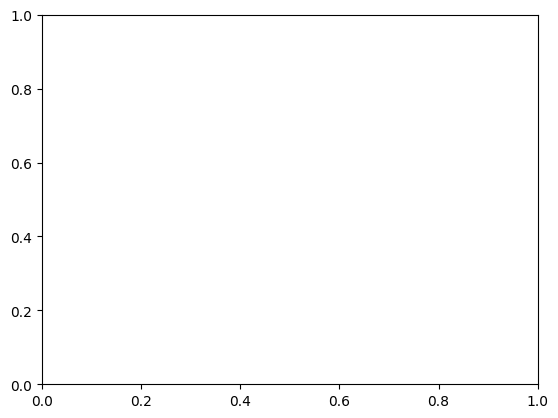

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import math
import time

def create_graph():
    G = nx.Graph()
    for i in range(1, 101):
        G.add_node(i)
    return G

def visualize(G):
    time.sleep(1)
    labeldict = get_labels(G)  
    nodesize = get_size(G)
    color_array = get_colors(G)
    nx.draw(G, labels=labeldict, node_size=nodesize,node_color=color_array)
    plt.savefig('evalution.jpg')
    plt.clf()
    plt.cla()

# Body mass index
def assign_bmi(G):
    for each in G.nodes():
        G.nodes[each]['name'] = random.randint(15, 40)
        G.nodes[each]['type'] = 'person'

def get_labels(G):
    label_dict = {}
    for each in G.nodes():
        label_dict[each] = G.nodes[each]['name']
    return label_dict

def get_size(G):
    size_array = []
    for each in G.nodes():
        if G.nodes[each]['type'] == 'person':
            size_array.append(G.nodes[each]['name'] * 20)
        else:
            size_array.append(1000)
    return size_array

def add_foci_nodes(G):
    n = G.number_of_nodes()
    i = n + 1
    foci_nodes = ['gym', 'eatout', 'movie_club', 'karate_club', 'yoga_club']
    for j in range(5):
        G.add_node(i)
        G.nodes[i]['name'] = foci_nodes[j]
        G.nodes[i]['type'] = 'foci'
        i += 1

def get_colors(G):
    c = []
    for each in G.nodes():
        if G.nodes[each]['type'] == 'person':
            if G.nodes[each]['name']==15:
                c.append('green')
            elif G.nodes[each]['name']==40:
                c.append('yellow')
            else:
                c.append('blue')
        else:
            c.append('red')
    return c

def get_foci_nodes():
    f = []
    for each in G.nodes():
        if G.nodes[each]['type'] == 'foci':
            f.append(each)
    return f

def get_person_nodes():
    f = []
    for each in G.nodes():
        if G.nodes[each]['type'] == 'person':
            f.append(each)
    return f

def add_foci_edges():
    foci_nodes = get_foci_nodes()
    person_nodes = get_person_nodes()
    for each in person_nodes:
        r = random.choice(foci_nodes)
        G.add_edge(each,r)

def homophily(G):
    pnodes = get_person_nodes()
    for u in pnodes:
        for v in pnodes:
            if u!=v:
                diff = abs(G.nodes[u]['name'] - G.nodes[v]['name'])
                p = float(1) / (diff+1000)
                r= random.uniform(0,1)
                if r<p:
                    G.add_edge(u,v)
def cmn(u,v,G):
    nu = set(G.neighbors(u))
    nv = set(G.neighbors(v))
    return len(nu & nv)

def closure(G):
    array1 = [] # each sub array contain 1st value 2nd value last is probability of a & b
    for u in G.nodes():
        for v in G.nodes():
            if u != v and (G.nodes[u]['type']=='person' or G.nodes[v]['type']=='person'):
                k = cmn(u,v,G)
                p = 1-math.pow((1-0.01),k)
                tmp = []
                tmp.append(u)
                tmp.append(v)
                tmp.append(p)
                array1.append(tmp)
    for each in array1:
        u = each[0]
        v = each[1]
        p = each[2]
        r = random.uniform(0,1)
        if r<p:
            G.add_edge(u,v)
def change_bmi(G):
    fnodes = get_foci_nodes()
    for each in fnodes:
        if G.nodes[each]['name']=='eatout':
            for each1 in G.neighbors(each):
                if G.nodes[each1]['name'] != 40:
                    G.nodes[each1]['name']=G.nodes[each1]['name']+1
        if G.nodes[each]['name']=='gym':
            for each1 in G.neighbors(each):
                if G.nodes[each1]['name'] != 15:
                    G.nodes[each1]['name']=G.nodes[each1]['name']-1



G = create_graph()
assign_bmi(G)
add_foci_nodes(G)
add_foci_edges()
time.sleep(10)
visualize(G)
for t in range(0,10):
    # visualize(G, labeldict, nodesize,color_array)
    homophily(G)
    # visualize(G, labeldict, nodesize,color_array)
    closure(G)
    change_bmi(G)
    visualize(G)


Fatman Evolutionary Model - Storing and analyzing longitudnal data

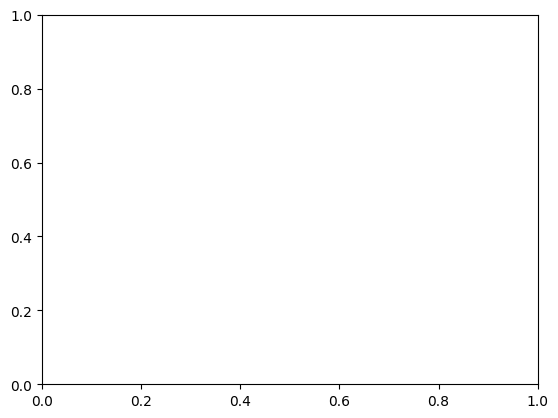

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import math
import time

def create_graph():
    G = nx.Graph()
    for i in range(1, 101):
        G.add_node(i)
    return G

def visualize(G,t):
    time.sleep(1)
    labeldict = get_labels(G)  
    nodesize = get_size(G)
    color_array = get_colors(G)
    nx.draw(G, labels=labeldict, node_size=nodesize,node_color=color_array)
    plt.savefig('evalution.jpg')
    plt.clf()
    plt.cla()
    nx.write_gml(G,'evalution_'+str(t)+'.gml')

# Body mass index
def assign_bmi(G):
    for each in G.nodes():
        G.nodes[each]['name'] = random.randint(15, 40)
        G.nodes[each]['type'] = 'person'

def get_labels(G):
    label_dict = {}
    for each in G.nodes():
        label_dict[each] = G.nodes[each]['name']
    return label_dict

def get_size(G):
    size_array = []
    for each in G.nodes():
        if G.nodes[each]['type'] == 'person':
            size_array.append(G.nodes[each]['name'] * 20)
        else:
            size_array.append(1000)
    return size_array

def add_foci_nodes(G):
    n = G.number_of_nodes()
    i = n + 1
    foci_nodes = ['gym', 'eatout', 'movie_club', 'karate_club', 'yoga_club']
    for j in range(5):
        G.add_node(i)
        G.nodes[i]['name'] = foci_nodes[j]
        G.nodes[i]['type'] = 'foci'
        i += 1

def get_colors(G):
    c = []
    for each in G.nodes():
        if G.nodes[each]['type'] == 'person':
            if G.nodes[each]['name']==15:
                c.append('green')
            elif G.nodes[each]['name']==40:
                c.append('yellow')
            else:
                c.append('blue')
        else:
            c.append('red')
    return c

def get_foci_nodes():
    f = []
    for each in G.nodes():
        if G.nodes[each]['type'] == 'foci':
            f.append(each)
    return f

def get_person_nodes():
    f = []
    for each in G.nodes():
        if G.nodes[each]['type'] == 'person':
            f.append(each)
    return f

def add_foci_edges():
    foci_nodes = get_foci_nodes()
    person_nodes = get_person_nodes()
    for each in person_nodes:
        r = random.choice(foci_nodes)
        G.add_edge(each,r)

def homophily(G):
    pnodes = get_person_nodes()
    for u in pnodes:
        for v in pnodes:
            if u!=v:
                diff = abs(G.nodes[u]['name'] - G.nodes[v]['name'])
                p = float(1) / (diff+1000)
                r= random.uniform(0,1)
                if r<p:
                    G.add_edge(u,v)
def cmn(u,v,G):
    nu = set(G.neighbors(u))
    nv = set(G.neighbors(v))
    return len(nu & nv)

def closure(G):
    array1 = [] # each sub array contain 1st value 2nd value last is probability of a & b
    for u in G.nodes():
        for v in G.nodes():
            if u != v and (G.nodes[u]['type']=='person' or G.nodes[v]['type']=='person'):
                k = cmn(u,v,G)
                p = 1-math.pow((1-0.01),k)
                tmp = []
                tmp.append(u)
                tmp.append(v)
                tmp.append(p)
                array1.append(tmp)
    for each in array1:
        u = each[0]
        v = each[1]
        p = each[2]
        r = random.uniform(0,1)
        if r<p:
            G.add_edge(u,v)
def change_bmi(G):
    fnodes = get_foci_nodes()
    for each in fnodes:
        if G.nodes[each]['name']=='eatout':
            for each1 in G.neighbors(each):
                if G.nodes[each1]['name'] != 40:
                    G.nodes[each1]['name']=G.nodes[each1]['name']+1
        if G.nodes[each]['name']=='gym':
            for each1 in G.neighbors(each):
                if G.nodes[each1]['name'] != 15:
                    G.nodes[each1]['name']=G.nodes[each1]['name']-1



G = create_graph()
assign_bmi(G)
add_foci_nodes(G)
add_foci_edges()
time.sleep(10)
t=0
visualize(G,t)
# nx.write_gml(G,'evalution_0.gml')
for t in range(0,10):
    # visualize(G, labeldict, nodesize,color_array)
    homophily(G)
    # visualize(G, labeldict, nodesize,color_array)
    closure(G)
    change_bmi(G)
    visualize(G,t+1)


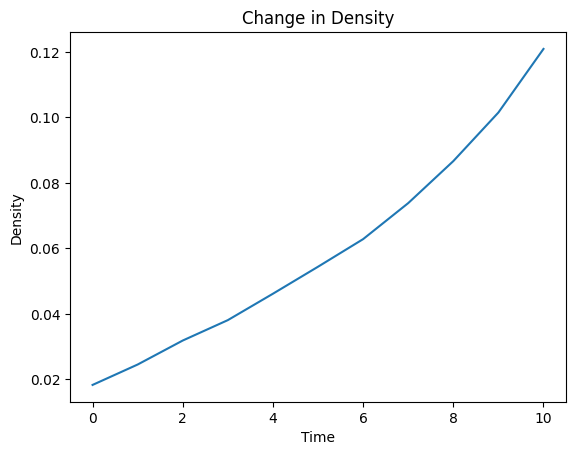

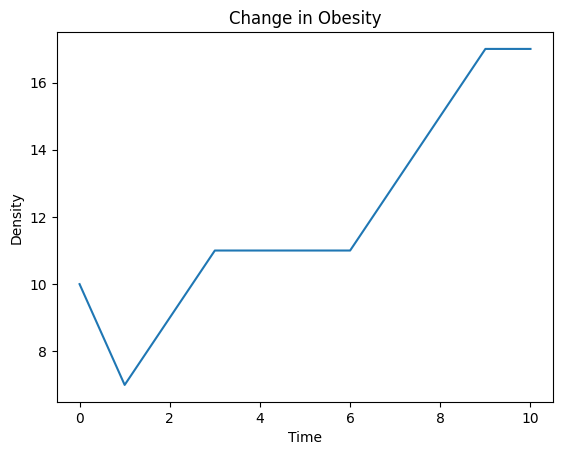

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_density():
    x=[]
    y=[]
    for i in range(0,11):
        G=nx.read_gml('evalution_'+str(i)+'.gml')
        x.append(i)
        y.append(nx.density(G))
    plt.xlabel('Time')
    plt.ylabel('Density')
    plt.title('Change in Density')
    plt.plot(x,y)
    plt.show()

def obesity(G):
    num=0
    for each in G.nodes():
        if G.nodes[each]['name']==40:
            num+=1
    return num

def plot_obesity():
    x=[]
    y=[]
    for i in range(0,11):
        G=nx.read_gml('evalution_'+str(i)+'.gml')
        x.append(i)
        y.append(obesity(G))
    plt.xlabel('Time')
    plt.ylabel('Density')
    plt.title('Change in Obesity')
    plt.plot(x,y)
    plt.show()


plot_density()
plot_obesity()